# Regression Analysis of Top 2023 Streamed Songs

In [22]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
import numpy as np

from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso, Ridge
from intro_Data import *

In [23]:
lin_reg = LR()
ss = SS()

In [17]:
data = pd.read_csv('clean_spotify_data.csv')
data.head()

,track_name,artists,artist_count,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor,total_playlist,total_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,141381703.0,125,11.0,80,89,83,31,0,8,4,34162,1,0,641,1246
1,LALA,Myke Towers,1,133716286.0,92,1.0,71,61,74,7,0,10,4,34049,1,0,1580,570
2,vampire,Olivia Rodrigo,1,140003974.0,138,5.0,51,32,53,17,0,31,6,34148,1,0,1582,1283
3,Cruel Summer,Taylor Swift,1,800840817.0,170,9.0,55,58,72,11,0,11,15,32741,1,0,8099,867
4,WHERE SHE GOES,Bad Bunny,1,303236322.0,144,9.0,65,23,80,14,63,11,6,34105,0,1,3304,623


In [19]:
#getting rid of qualitative variables
spotify= data.drop(columns=['track_name', 'artists'])

In [24]:
#Scaling data!
spotify_scaled = pd.DataFrame(ss.fit_transform(spotify), columns = 
                          spotify.columns)

<Axes: xlabel='streams', ylabel='Count'>

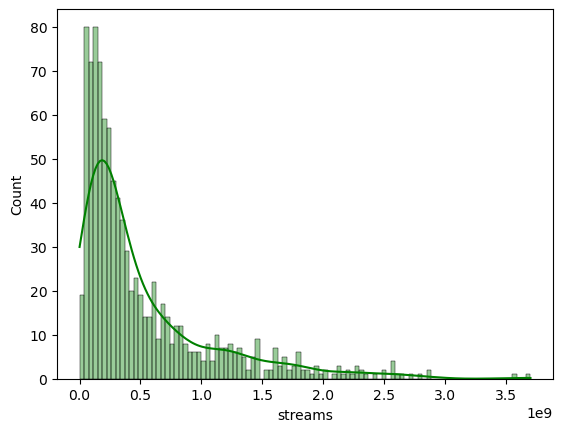

In [18]:
sns.histplot(data=data['streams'], color='g',bins=100, alpha=0.4, kde=True)

In [171]:
spotify_log = spotify_scaled.copy()

In [28]:
spotify_log['streams'] = np.log10(spotify['streams']+1)
spotify_log['acousticness_%'] = np.log10(spotify['acousticness_%']+1)
spotify_log['liveness_%'] = np.log10(spotify['liveness_%']+1)
spotify_log['speechiness_%'] = np.log10(spotify['speechiness_%']+1)
spotify_log['instrumentalness_%'] = np.log10(spotify['instrumentalness_%']+1)
spotify_log['total_playlist'] = np.log10(spotify['total_playlist']+1)
spotify_log['total_charts'] = np.log10(spotify['total_charts']+1)
spotify_log['released_date'] = np.log10(spotify['released_date']+1)

In [172]:
#transforming all...
spotify_log['streams'] = np.log10(spotify['streams']+1)
spotify_log['acousticness_%'] = np.log10(spotify['acousticness_%']+1)
spotify_log['liveness_%'] = np.log10(spotify['liveness_%']+1)
spotify_log['speechiness_%'] = np.log10(spotify['speechiness_%']+1)
spotify_log['instrumentalness_%'] = np.log10(spotify['instrumentalness_%']+1)
spotify_log['total_playlist'] = np.log10(spotify['total_playlist']+1)
spotify_log['total_charts'] = np.log10(spotify['total_charts']+1)
spotify_log['released_date'] = np.log10(spotify['released_date']+1)
spotify_log['danceability_%'] = np.log10(spotify['danceability_%']+1)
spotify_log['valence_%'] = np.log10(spotify['valence_%']+1)
spotify_log['energy_%'] = np.log10(spotify['energy_%']+1)
spotify_log['artist_count'] = np.log10(spotify['artist_count']+1)


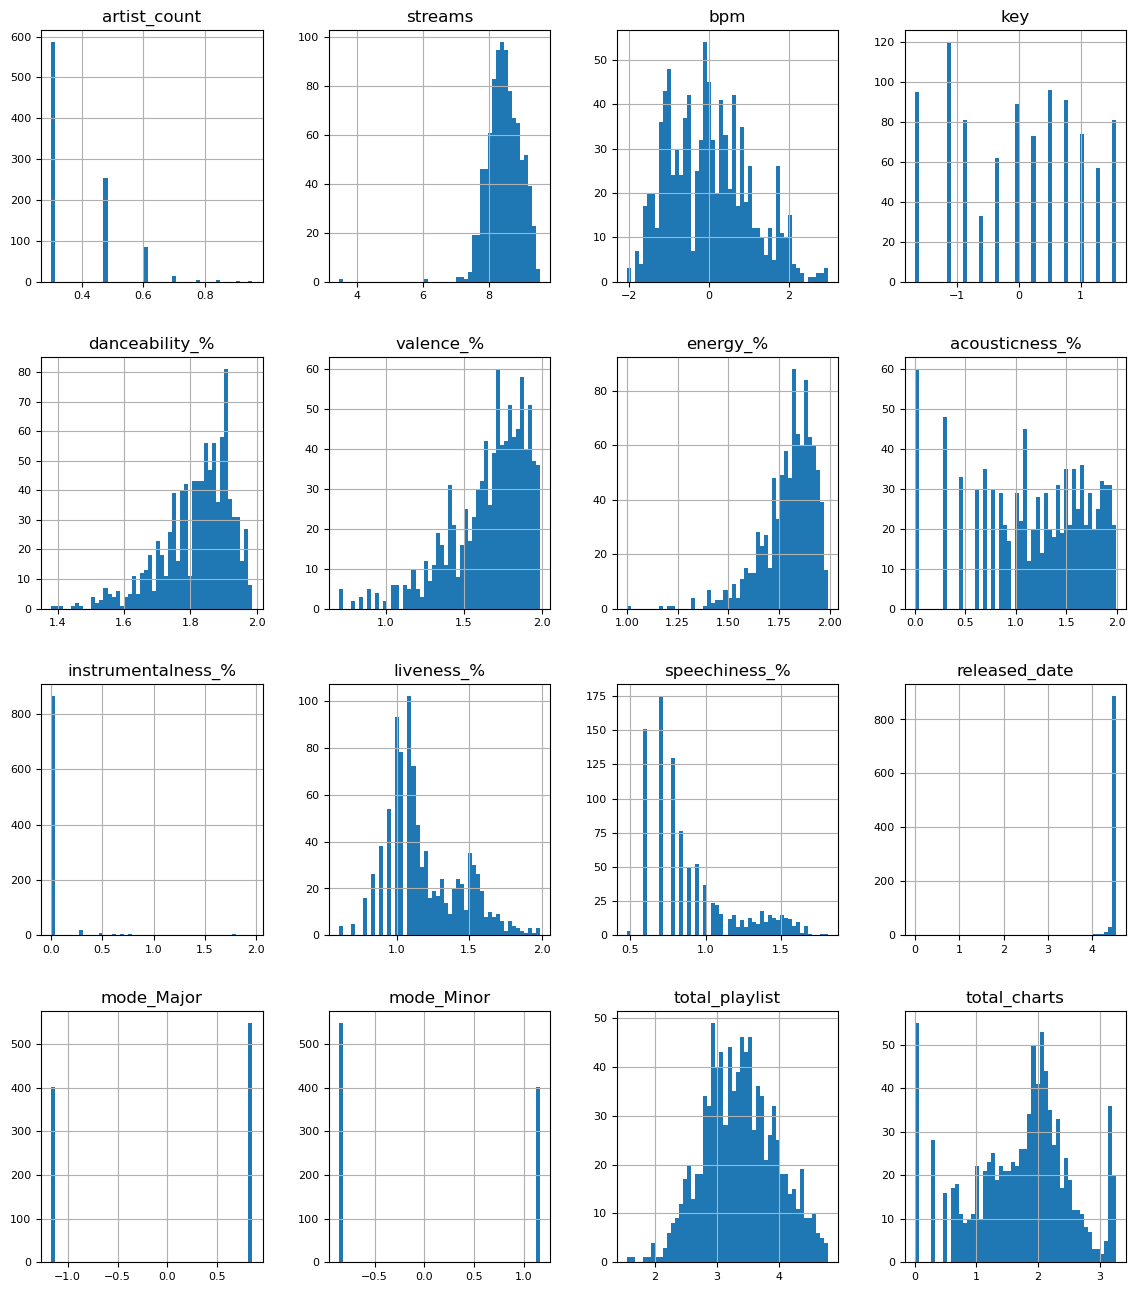

In [173]:
spotify_log.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8);
#plt.savefig('officehour/no_transformation_hist.png')

In [39]:
spotify_log.to_csv('logvars.csv',index=False)

# Bivariate Analysis

After looking at our variables, a logarithmic tranformation was done to attain a normal distribution across all of the indpendent variables. This is important if we want to try ridge and lasso regression

In [257]:
%%HTML
<div class='tableauPlaceholder' id='viz1702509560454' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4m&#47;4model&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='4model&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4m&#47;4model&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1702509560454');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [249]:
LABELS=['Artist Count', 'streams', 'bpm', 'key', 'danceability %', 'valence %',
       'energy %', 'acousticness %', 'instrumentalness %', 'liveness %',
       'speechiness %', 'released date', 'Major Key', 'Minor Key',
       'total playlist', 'total charts']

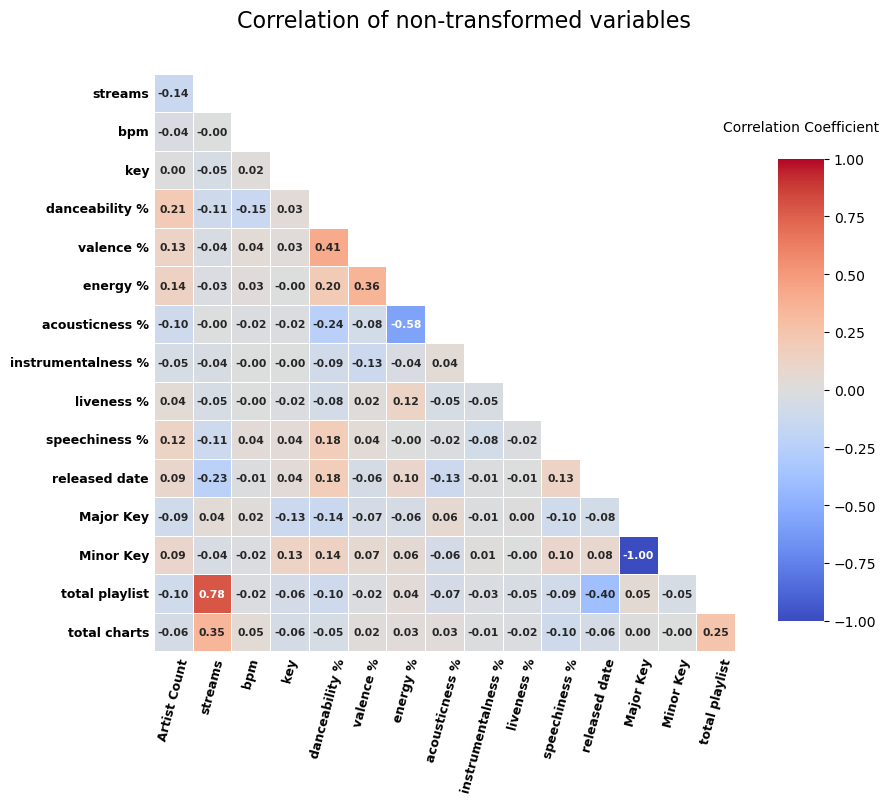

In [252]:
c=spotify_scaled.corr()
plt.figure(figsize = [10,8])
mask = np.triu(c)
sns.heatmap(c, annot = True, mask = mask, cmap = 'coolwarm', fmt=".2f",vmin = -1, vmax = 1,
           linewidth = 0.5, annot_kws={'fontsize':7.8, 'weight':'bold'}, cbar_kws={'shrink':0.75,
                                                                                 'aspect':10,
                                                                                 'anchor':(-0.5,0.2)}
           )
ax = plt.gca()

ax.set_yticks(ax.get_yticks()[1:],labels = LABELS[1:], size =9, weight = 'bold')
ax.set_xticks(ax.get_xticks()[:-1], labels = LABELS[:-1], size = 9, weight = 'bold', rotation =75)
ax.tick_params(length = 0)

cbar = ax.collections[0].colorbar
ticklabs = cbar.ax.get_ymajorticklabels()
cbar.ax.tick_params(labelsize = 10)
cbar.ax.set_title('Correlation Coefficient', fontsize = 10, pad = 20)
plt.title('Correlation of non-transformed variables', fontsize=16)
plt.savefig('officehour/corr_vars_nontransformed.png')
plt.show()

Let's look at the correlation for our transformed variables

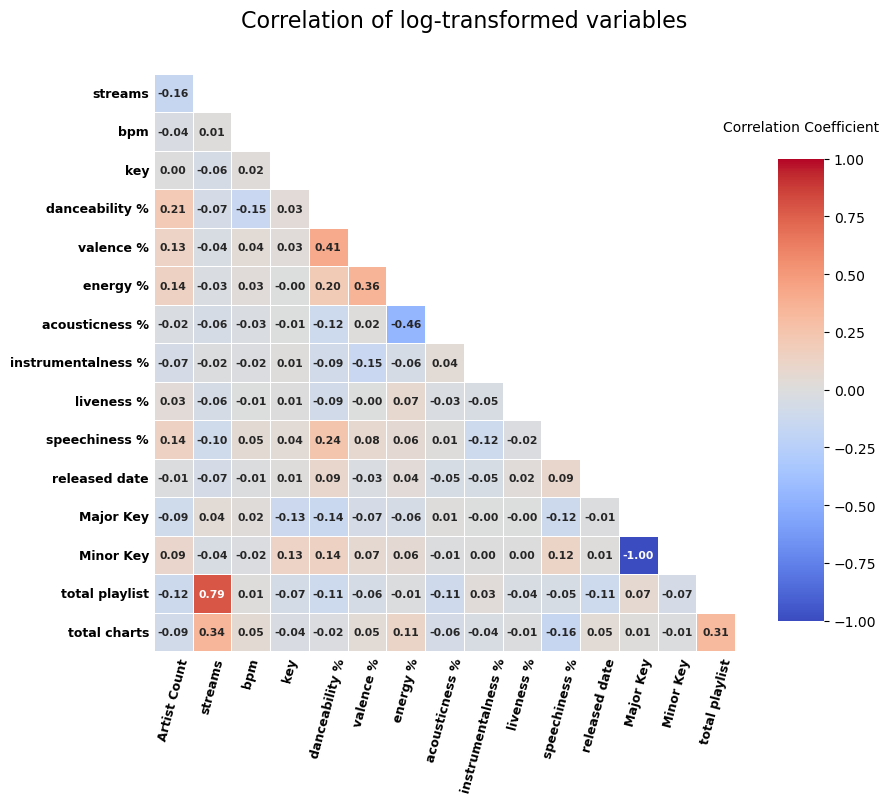

In [50]:
c_log =spotify_log.corr()
plt.figure(figsize = [10,8])
mask = np.triu(c_log)
sns.heatmap(c_log, annot = True, mask = mask, cmap = 'coolwarm',fmt=".2f", vmin = -1, vmax = 1,
           linewidth = 0.5, annot_kws={'fontsize':7.8, 'weight':'bold'}, cbar_kws={'shrink':0.75,
                                                                                 'aspect':10,
                                                                                 'anchor':(-0.5,0.2)}
           )
ax = plt.gca()
#let's fix the labels 
#we can make font larger and remove the redundant labels
ax.set_yticks(ax.get_yticks()[1:],labels = LABELS[1:], size =9, weight = 'bold')
ax.set_xticks(ax.get_xticks()[:-1], labels = LABELS[:-1], size = 9, weight = 'bold', rotation =75)
ax.tick_params(length = 0)
#format the colorbar
#make the colorbar smaller
cbar = ax.collections[0].colorbar
ticklabs = cbar.ax.get_ymajorticklabels()
cbar.ax.tick_params(labelsize = 10)
cbar.ax.set_title('Correlation Coefficient', fontsize = 10, pad = 20)
plt.title('Correlation of log-transformed variables', fontsize=16)
plt.savefig('officehour/corr_vars_transformed.png')
plt.show()

# PCA 

Principal Component Analysis is often used to reduce the number of dimensions used in our model and help us figure out which variables are important

In [56]:
target = spotify_log['streams'] #separating our dependent variable streams
predictors = spotify_log.drop(columns = ['streams']) 

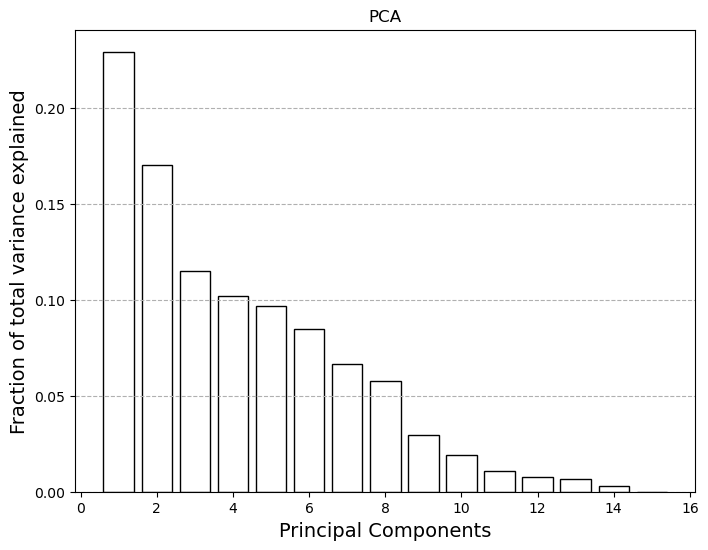

In [57]:
pca = PCA()

pca_spotify= pca.fit_transform(predictors)
evr = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.bar(range(1, len(evr)+1), evr, fill = False)
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Fraction of total variance explained', fontsize=14)
plt.title('PCA')
plt.show()

In [55]:
for i in range(1,len(pca.explained_variance_ratio_)+1):
    lin_reg = LR()
    X = pca_spotify[:,:i]
    lin_reg.fit(X,target)
    print(lin_reg.score(X,target))

0.011147949689128578
0.013427291483451897
0.03626146996562063
0.059584289353061926
0.11217110003004349
0.11529374652192137
0.27192128093188983
0.2724114490300291
0.6085299178155312
0.6355695396025423
0.6361370338846174
0.6405214377703696
0.6407839430715419
0.6413250680954156
0.6419783110070826


# Trying different models

In [62]:
coefs = pd.DataFrame(columns = ['OLS','Ridge','Lasso'])

In [80]:
X = np.array(pca_spotify)
y=np.array(target)

## OLS

In [184]:
lin_reg.fit(X,y)
coefs['OLS'] = lin_reg.coef_

In [185]:
from sklearn.model_selection import train_test_split as tts
Xtrain,Xvalid,ytrain,yvalid = tts(X,y,test_size=0.4, shuffle=True, random_state = 146)
lin_reg.fit(Xtrain,ytrain)

print('Internal validity (R^2) :', format(lin_reg.score(Xtrain,ytrain), '.2f'))
print('External validity (R^2) :', format(lin_reg.score(Xvalid,yvalid), '.2f'))

Internal validity (R^2) : 0.73
External validity (R^2) : 0.54


In [186]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=146, shuffle=True)

train_scores = []
validation_scores = []

for idxTrain,idxValid in kf.split(X):

    Xtrain = X[idxTrain,:]
    Xvalid = X[idxValid]
    ytrain = y[idxTrain]
    yvalid = y[idxValid]
    
    lin_reg.fit(Xtrain,ytrain)
    
    train_scores.append(lin_reg.score(Xtrain,ytrain))
    validation_scores.append(lin_reg.score(Xvalid,yvalid))

In [187]:
train_scores

[0.6359321083258723,
 0.7129615229458706,
 0.6216923533219421,
 0.6313526129950421,
 0.6229339568475654]

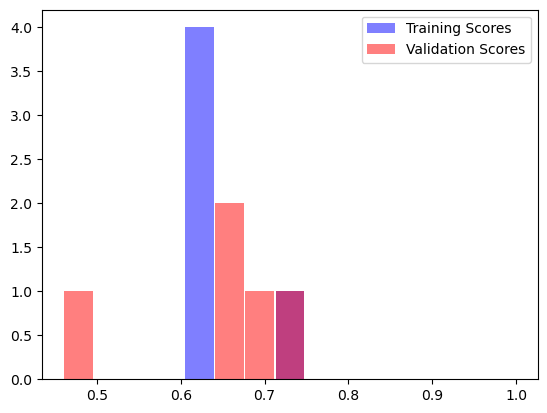

In [188]:
# Visualize as histogram

min_r2 = min(min(validation_scores), min(train_scores))
max_r2 = 1

n_bins = 15
my_bins = np.linspace(min_r2, max_r2, n_bins+1)

plt.hist(train_scores, label='Training Scores', color='blue', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.hist(validation_scores, label='Validation Scores', color='red', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.legend()
plt.show()

In [196]:
y_pred=lin_reg.predict(Xvalid)

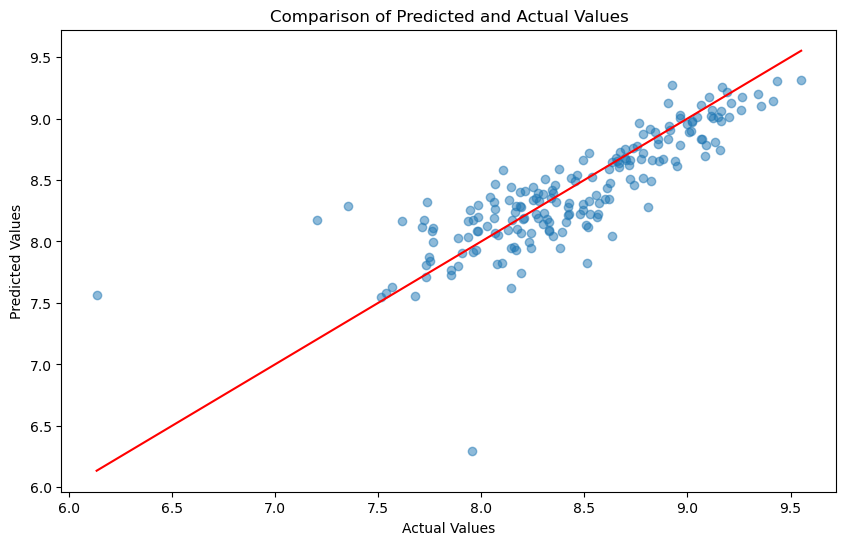

In [199]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(yvalid, y_pred, alpha=0.5)
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([np.min(yvalid), np.max(yvalid)], [np.min(yvalid), np.max(yvalid)], color='red') # Diagonal line
plt.show()

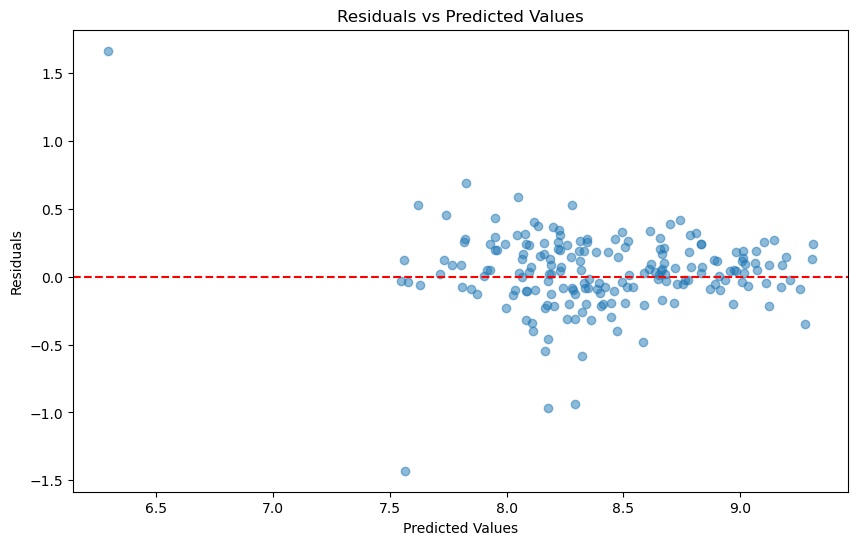

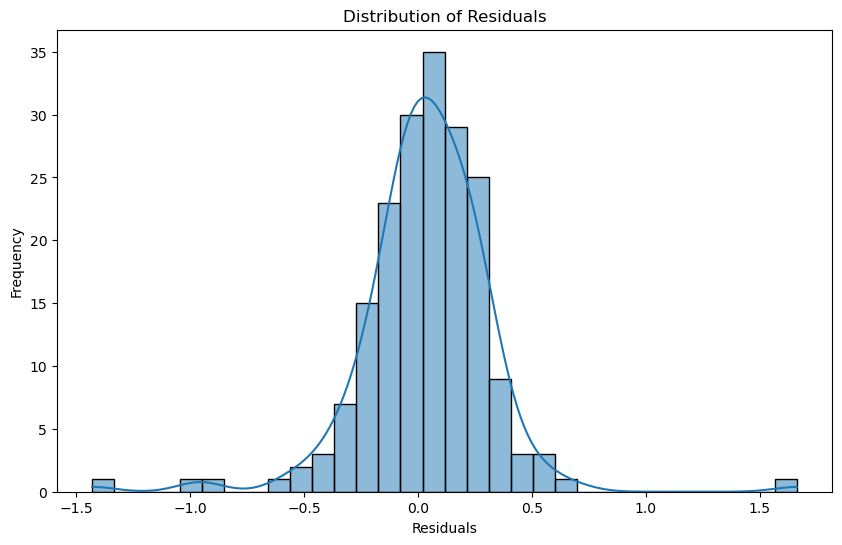

In [200]:
residuals = yvalid - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Ridge regression

In [201]:
X = np.array(pca_spotify)
y=np.array(target)

In [202]:
a_range = np.linspace(5,15,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    rid_reg = Ridge(alpha=a, max_iter = 10000)
    train_scores, test_scores = do_Kfold(rid_reg, X, y, k)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

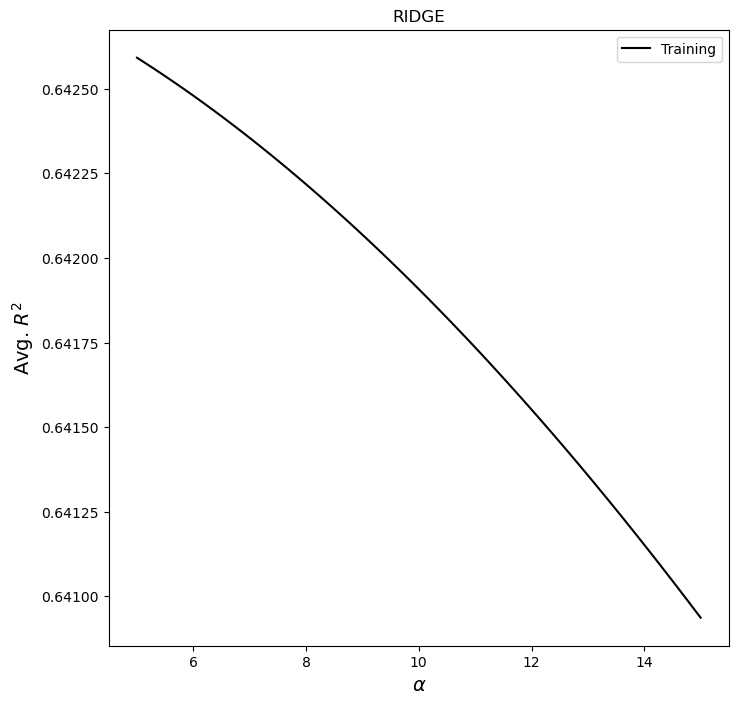

In [203]:
plt.figure(figsize=(8,8))
plt.plot(a_range, avg_tr_score, color='k', label='Training')
#plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.title('RIDGE')
plt.show()

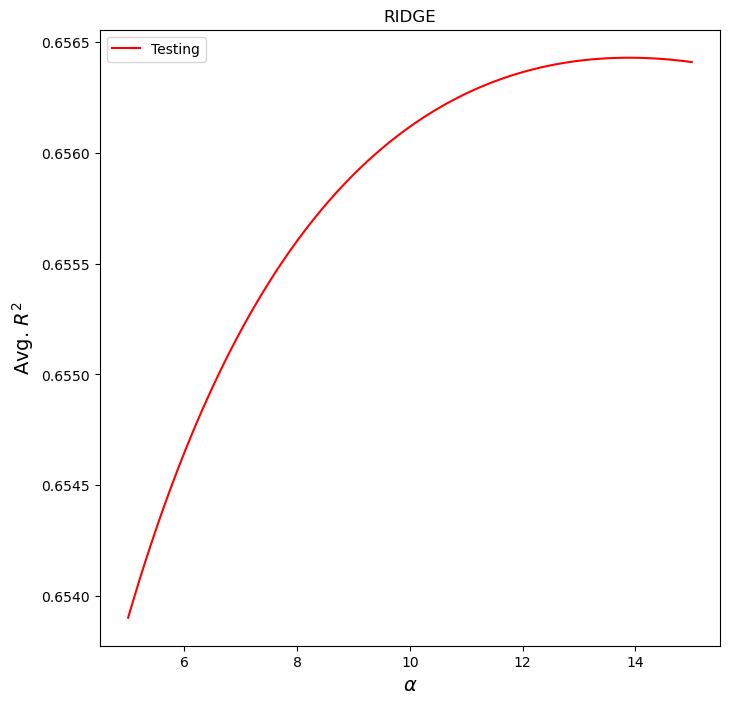

In [204]:
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.title('RIDGE')
plt.show()

In [205]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  13.88888888888889
Avg. training score at this value:  0.6411755034527815
Avg. testing score at this value:  0.6564287582413557


In [206]:
rid_reg = Ridge(alpha= a_range[idx_max])
rid_reg.fit(X,y)

Ridge(alpha=13.88888888888889)

In [207]:
coefs['Ridge'] = rid_reg.coef_

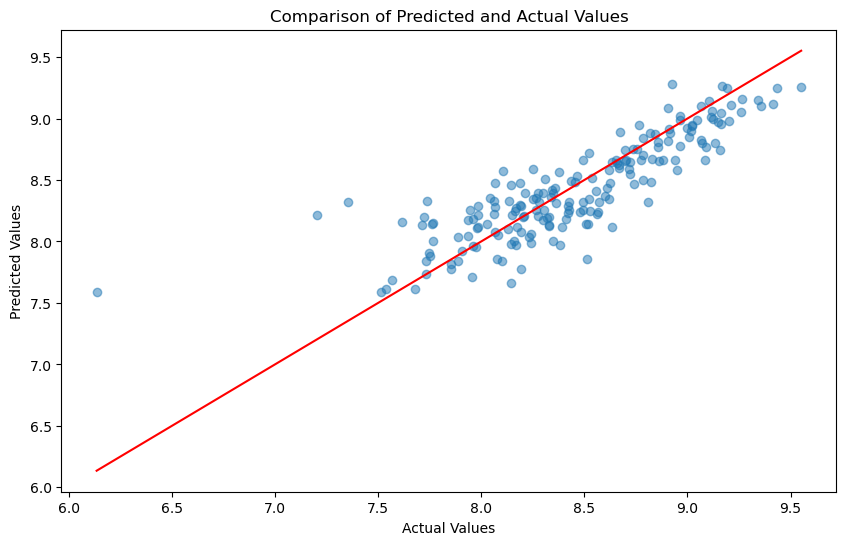

In [213]:
# Create the scatter plot
y_pred=rid_reg.predict(Xvalid)
plt.figure(figsize=(10, 6))
plt.scatter(yvalid, y_pred, alpha=0.5)
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([np.min(yvalid), np.max(yvalid)], [np.min(yvalid), np.max(yvalid)], color='red') # Diagonal line
plt.show()

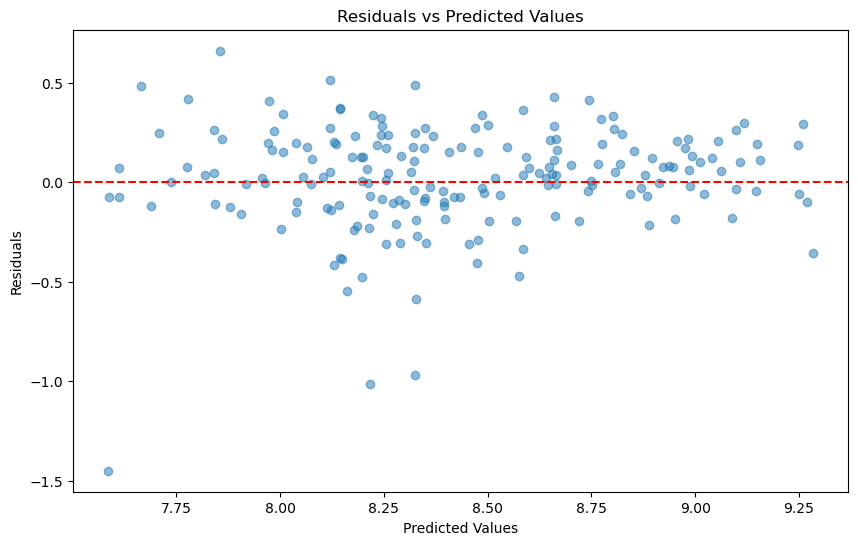

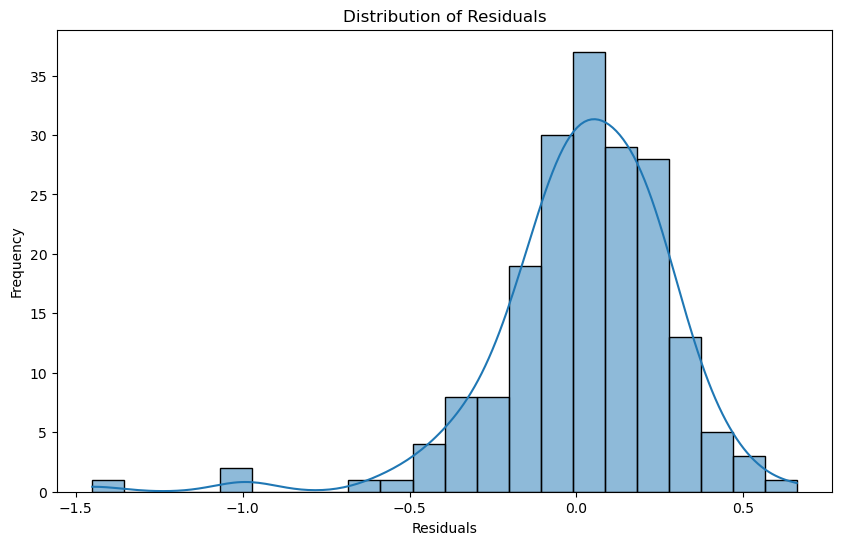

In [214]:
residuals = yvalid - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Lasso

In [225]:
X = np.array(pca_spotify)
y=np.array(target)

In [226]:
a_range = np.linspace(1e-6,1,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a, max_iter = 10000)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

In [227]:
a_range = np.linspace(1e-8,1e-2,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a, max_iter = 10000)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

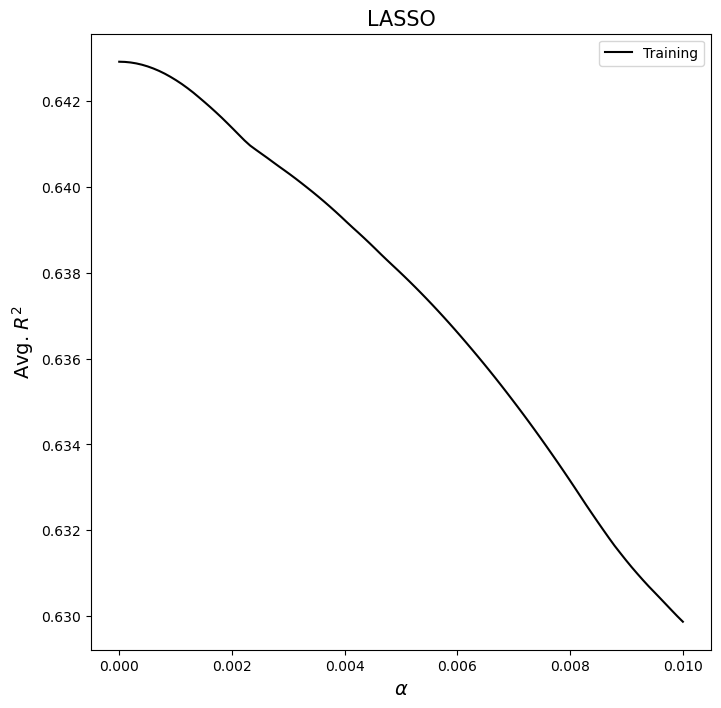

In [228]:
plt.figure(figsize=(8,8))
plt.plot(a_range, avg_tr_score, color='k', label='Training')
#plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.title('LASSO', fontsize=15)
plt.show()

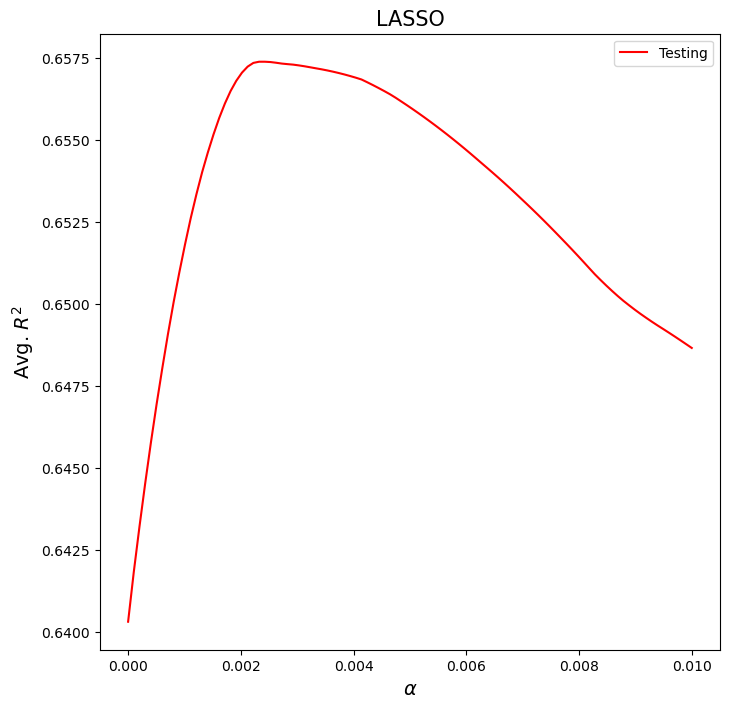

In [229]:
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.title('LASSO', fontsize=15)
plt.show()

In [230]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  0.0024242499999999998
Avg. training score at this value:  0.6408676136218837
Avg. testing score at this value:  0.6573847617594323


In [231]:
las_reg = Lasso(alpha= a_range[idx_max])
las_reg.fit(X,y)

Lasso(alpha=0.0024242499999999998)

In [232]:
coefs['Lasso'] = las_reg.coef_

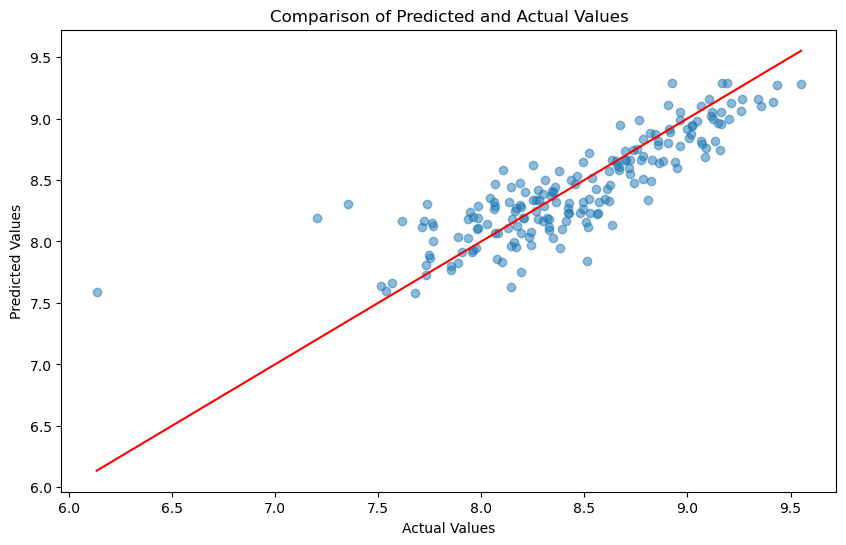

In [233]:
# Create the scatter plot
y_pred=las_reg.predict(Xvalid)
plt.figure(figsize=(10, 6))
plt.scatter(yvalid, y_pred, alpha=0.5)
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([np.min(yvalid), np.max(yvalid)], [np.min(yvalid), np.max(yvalid)], color='red') # Diagonal line
plt.show()

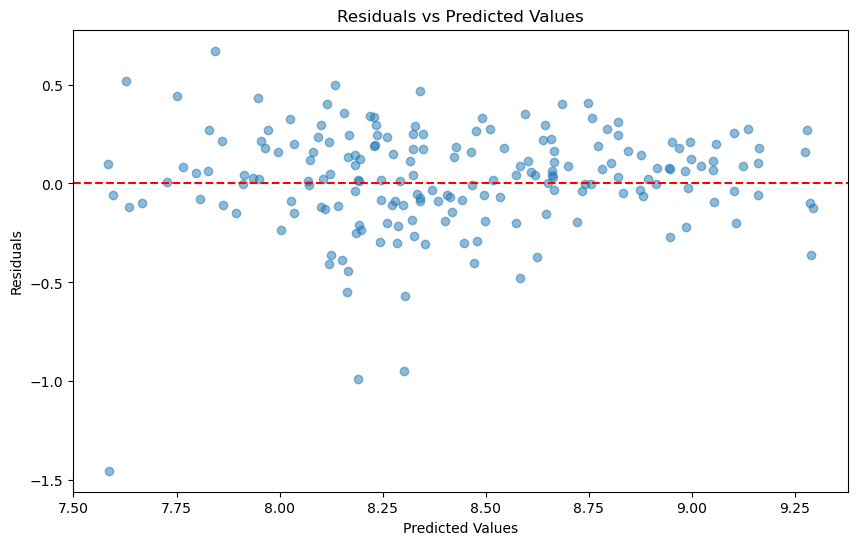

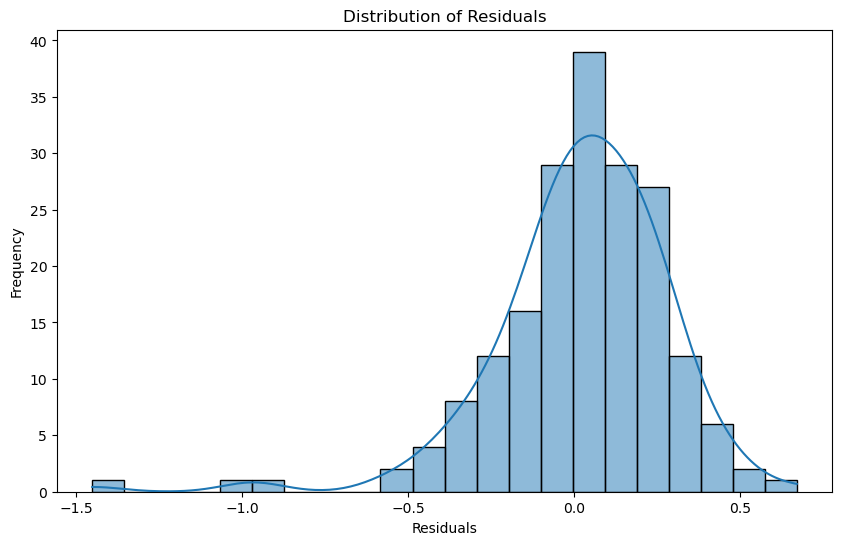

In [234]:
residuals = yvalid - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [101]:
coefs

,OLS,Ridge,Lasso
0,-3.544078e-02,-3.520702e-02,-0.034337
1,1.859836e-02,1.843351e-02,0.017112
2,7.155778e-02,7.062449e-02,0.069362
3,7.679485e-02,7.566734e-02,0.074319
4,-1.184710e-01,-1.166365e-01,-0.115857
5,-3.087618e-02,-3.033050e-02,-0.027887
6,2.461077e-01,2.406243e-01,0.242321
7,1.482615e-02,1.444443e-02,0.010435
8,5.424760e-01,5.158607e-01,0.533903
9,-1.898300e-01,-1.760074e-01,-0.176780


In [236]:
print(coefs['OLS'].mean())
print(coefs['Ridge'].mean())
print(coefs['Lasso'].mean())


-1362389567684.582
0.024783286542825918
0.03272722257638082
